<a href="https://colab.research.google.com/github/yashvantraodipti/Assignment15/blob/main/Assignment_15_Random_Forest_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 15. Random Forest - 02**
**Dataset: Fraud_check.csv**

In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Loading Dataset
data = pd.read_csv('/content/Fraud_check.csv')

#**EDA & Data Preprocessing**

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# Renaming columns
data = data.rename({'Undergrad':'under_grad', 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income',
                    'City.Population':'city_population', 'Work.Experience':'work_experience', 'Urban':'urban'}, axis = 1)
data.head()

,under_grad,marital_status,taxable_income,city_population,work_experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data.describe()

,taxable_income,city_population,work_experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


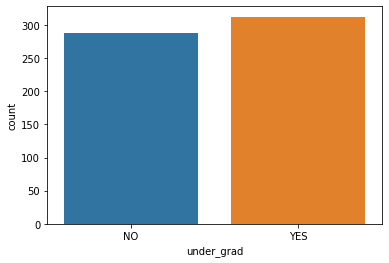

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


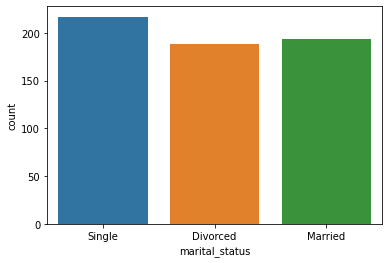

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


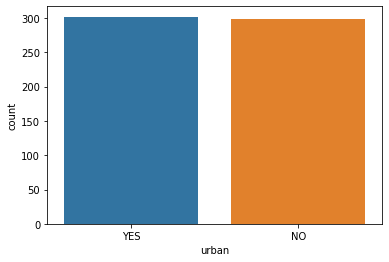

In [7]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(data['under_grad'])
plt.show()

sns.countplot(data['marital_status'])
plt.show()

sns.countplot(data['urban'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


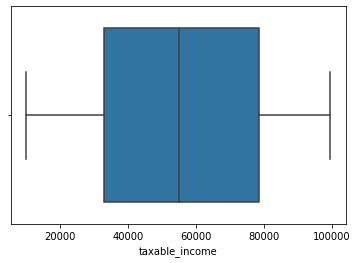

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


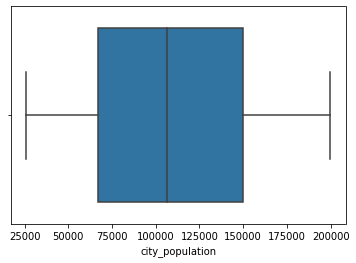

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


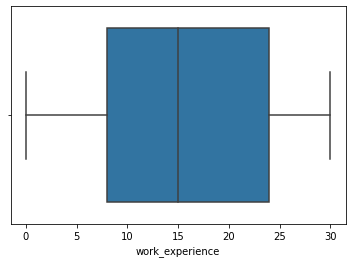

In [8]:
# Checking for outliers in numerical data
sns.boxplot(data['taxable_income'])
plt.show()

sns.boxplot(data['city_population'])
plt.show()

sns.boxplot(data['work_experience'])
plt.show()

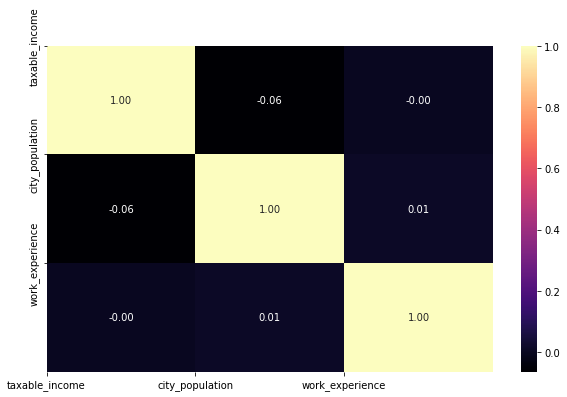

In [9]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [10]:
# Converting categorical variables into dummy variables
data = pd.get_dummies(data)

In [11]:
data.head()

,taxable_income,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [12]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data['taxable_category'] = pd.cut(x = data['taxable_income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,taxable_income,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


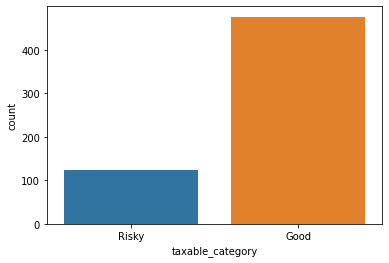

In [13]:
sns.countplot(data['taxable_category'])

In [14]:
data['taxable_category'].value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [15]:
# dropping column taxable_income
data1 = data.drop('taxable_income', axis = 1)
data1

,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_category
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


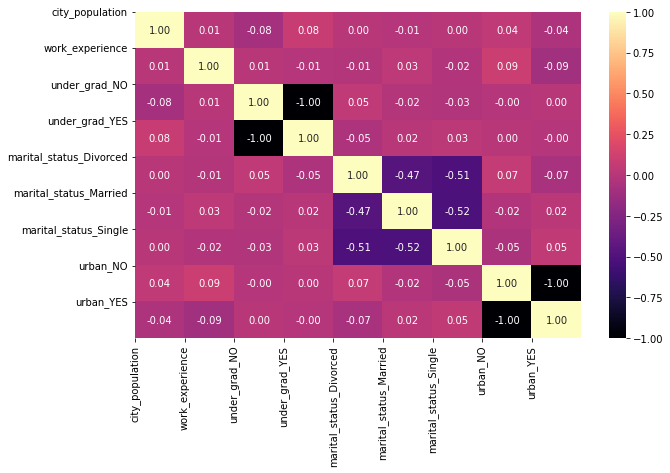

In [16]:
# Correlation analysis for data11
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [17]:
# Dividing data into independent variables and dependent variable
X = data1.drop('taxable_category', axis = 1)
y = data1['taxable_category']

In [18]:
X

,city_population,work_experience,under_grad_NO,under_grad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [19]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_category, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

**Splitting data into train and test data**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(402, 9)
(198, 9)
(402,)
(198,)


#**Random Forest Classification**

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 'auto'
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [23]:
# Train the model on training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7392682926829269


**Bagged Decision Trees for Classification**

In [27]:
from sklearn.ensemble import BaggingClassifier

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7342682926829267


#**AdaBoost Classification**

In [29]:
from sklearn.ensemble import AdaBoostClassifier

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = AdaBoostClassifier(n_estimators=10, random_state=42)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.7864634146341463
